In [2]:
import pandas as pd
import io
from io import StringIO
from sklearn.model_selection import train_test_split

In [3]:
dm=pd.read_excel('/content/IPL_2020.xlsx')
dm.head()

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Avg 1st Innings Score,Avg 2nd Innings Score,umpire1,umpire2,umpire3,Pitch Type
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",185,175,AY Dandekar,NJ Llong,NaN,Batting
1,2,2017,Pune,2017-04-06,Mumbai Indians,61,1,Rising Pune Supergiant,59,1,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,160,148,A Nand Kishore,S Ravi,NaN,Batting & Spinner Friendly
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,52,1,Kolkata Knight Riders,73,0,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,183,170,Nitin Menon,CK Nandan,NaN,Batting
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,35,1,Kings XI Punjab,56,2,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,160,158,AK Chaudhary,C Shamshuddin,NaN,Batting
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,41,2,Delhi Daredevils,43,2,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,170,150,NaN,NaN,NaN,Batting


In [4]:
dm.shape

(812, 25)

In [ ]:
dm1 = dm[['season','venue','team1','team2','toss_winner','toss_decision','win_by_runs','win_by_wickets','winner']]
dm1

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,35,0,Sunrisers Hyderabad
1,2017,Maharashtra Cricket Association Stadium,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,7,Rising Pune Supergiant
2,2017,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,10,Kolkata Knight Riders
3,2017,Holkar Cricket Stadium,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,6,Kings XI Punjab
4,2017,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,15,0,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...
807,2020,Sharjah Cricket Stadium,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bowl,0,10,Sunrisers Hyderabad
808,2020,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,bowl,57,0,Mumbai Indians
809,2020,Sheikh Zayed Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bowl,0,6,Sunrisers Hyderabad
810,2020,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,17,0,Delhi Capitals


In [ ]:
a = dm1.team1.unique()
print(a)

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Delhi Capitals']


In [ ]:
dm1.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','SRH','CSK','RR','DC','GL','KXIP','SRH','RPS','RPS','KTK','PW','DC'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
dm1.replace(encode, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
dm1.team1.unique()

array([10,  1,  8, 11,  3,  2,  4,  9,  5,  6, 12, 13])

In [ ]:
dm1.head()

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,"Rajiv Gandhi International Stadium, Uppal",10,3,3,field,35,0,10
1,2017,Maharashtra Cricket Association Stadium,1,11,11,field,0,7,11
2,2017,Saurashtra Cricket Association Stadium,8,2,2,field,0,10,2
3,2017,Holkar Cricket Stadium,11,9,9,field,0,6,9
4,2017,M Chinnaswamy Stadium,3,4,3,bat,15,0,3


In [ ]:
dm1['toss_decision'] = dm1.apply(lambda x: x['toss_winner']*-1 if x['toss_decision']=='field' else x['toss_winner'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dm1.head()

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,"Rajiv Gandhi International Stadium, Uppal",10,3,3,-3,35,0,10
1,2017,Maharashtra Cricket Association Stadium,1,11,11,-11,0,7,11
2,2017,Saurashtra Cricket Association Stadium,8,2,2,-2,0,10,2
3,2017,Holkar Cricket Stadium,11,9,9,-9,0,6,9
4,2017,M Chinnaswamy Stadium,3,4,3,3,15,0,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
var = ['venue']
le = LabelEncoder()
for i in var:
    dm1[i] = le.fit_transform(dm1[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dm1.head()

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,28,10,3,3,-3,35,0,10
1,2017,21,1,11,11,-11,0,7,11
2,2017,31,8,2,2,-2,0,10,2
3,2017,13,11,9,9,-9,0,6,9
4,2017,17,3,4,3,3,15,0,3


In [ ]:
x = dm1.iloc[:,0:8]
y = dm1.winner
x
y

0      10
1      11
2       2
3       9
4       3
       ..
807    10
808     1
809    10
810     4
811     1
Name: winner, Length: 812, dtype: int64

In [ ]:
x.dtypes

season            int64
venue             int64
team1             int64
team2             int64
toss_winner       int64
toss_decision     int64
win_by_runs       int64
win_by_wickets    int64
dtype: object

In [ ]:
NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(x_train, y_train);
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 26.993865030674847


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.46      0.45        28
           2       0.27      0.32      0.29        22
           3       0.50      0.10      0.17        20
           4       0.15      0.33      0.21        15
           5       0.70      0.30      0.42        23
           6       0.29      0.15      0.20        13
           8       0.25      0.67      0.36         3
           9       0.08      0.06      0.06        18
          10       0.19      0.27      0.22        15
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.25      0.50      0.33         2

    accuracy                           0.27       163
   macro avg       0.26      0.26      0.23       163
weighted avg       0.34      0.27      0.27       163



In [ ]:
Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
x = dm1.iloc[:,0:8]
y = dm1.winner

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.50819672131148


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91        39
           2       0.86      0.80      0.83        30
           3       0.75      0.89      0.81        27
           4       0.74      0.64      0.68        22
           5       0.71      0.83      0.77        30
           6       0.83      0.74      0.78        27
           8       0.75      1.00      0.86         3
           9       0.83      0.75      0.79        32
          10       0.78      0.81      0.79        26
          11       0.20      0.33      0.25         3
          12       1.00      0.50      0.67         2
          13       1.00      0.67      0.80         3

    accuracy                           0.80       244
   macro avg       0.78      0.74      0.74       244
weighted avg       0.81      0.80      0.80       244



In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
feature_cols = ['season', 'venue', 'team1', 'team2','toss_winner','toss_decision','win_by_runs','win_by_wickets']
team1 = ['10',  '1',  '8', '11',  '3',  '2',  '4',  '9',  '5',  '6', '12', '13'] 

In [ ]:
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=team1,
                   filled=True)

In [ ]:
Random Forest

In [ ]:
x = dm1.iloc[:,0:8]
y = dm1.winner

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

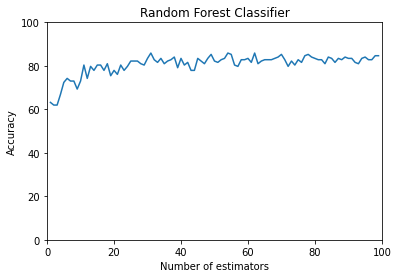

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
xp =[]
yp =[]
maxp = 0
minp = 100
nM = 1
nm = 1
aa = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
for i in range (1,100):
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    p = metrics.accuracy_score(y_test, y_pred)
    if p*100 > maxp:
        maxp = p*100
        nM = i
    if p*100 < minp:
        minp = p*100
        nm = i
    xp.append(i)
    yp.append(p*100)
    aa = aa + p*100
plt.plot(xp, yp)
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier')
plt.show()


In [ ]:
print("Maximum Accuracy:",maxp," at number of estimators = ",nM)
print("Minimum Accuracy:",minp," at number of estimators = ",nm)
print("Average Accuracy:",aa/100)

Maximum Accuracy: 85.88957055214725  at number of estimators =  31
Minimum Accuracy: 61.963190184049076  at number of estimators =  2
Average Accuracy: 79.86503067484657


In [ ]:
Calculate the probability of chasing down a specific score at a specific venue using Logistic Regression.

In [ ]:
bb = pd.read_excel('/content/IPL Ball-by-Ball 2008-2020.xlsx')
bb.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bb = bb.drop(['start_date', 'ball','striker','non_striker','bowler','wides','noballs','legbyes','byes','penalty','wicket_type','player_dismissed','other_wicket_type','other_player_dismissed'], axis=1)

In [ ]:
bb.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [ ]:
bb = bb[(bb.venue == 'Rajiv Gandhi International Stadium')]

In [ ]:
bb

,match_id,season,venue,innings,batting_team,bowling_team,runs_off_bat,extras
152159,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,0,0
152160,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,0,0
152161,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,2,0
152162,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,1,0
152163,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,0,0
...,...,...,...,...,...,...,...,...
179053,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,1,0
179054,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,2,0
179055,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,1,0
179056,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,2,0


In [ ]:
bb['runs'] = bb.apply(lambda x: x['runs_off_bat'] + x['extras'], axis=1)
bb

,match_id,season,venue,innings,batting_team,bowling_team,runs_off_bat,extras,runs
152159,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,0,0,0
152160,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,0,0,0
152161,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,2,0,2
152162,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,1,0,1
152163,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,0,0,0
...,...,...,...,...,...,...,...,...,...
179053,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,1,0,1
179054,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,2,0,2
179055,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,1,0,1
179056,1181768,2019,Rajiv Gandhi International Stadium,2,Chennai Super Kings,Mumbai Indians,2,0,2


In [ ]:
bb[(bb.extras >0) & (bb.runs_off_bat >0)]

,match_id,season,venue,innings,batting_team,bowling_team,runs_off_bat,extras,runs
152223,1175363,2019,Rajiv Gandhi International Stadium,1,Rajasthan Royals,Sunrisers Hyderabad,1,1,2
157617,1178405,2019,Rajiv Gandhi International Stadium,1,Delhi Capitals,Sunrisers Hyderabad,2,1,3
157682,1178405,2019,Rajiv Gandhi International Stadium,2,Sunrisers Hyderabad,Delhi Capitals,1,1,2
159342,1136564,2018,Rajiv Gandhi International Stadium,2,Sunrisers Hyderabad,Rajasthan Royals,1,1,2
166899,1136596,2018,Rajiv Gandhi International Stadium,2,Sunrisers Hyderabad,Delhi Daredevils,1,1,2
176304,1178423,2019,Rajiv Gandhi International Stadium,2,Kings XI Punjab,Sunrisers Hyderabad,1,1,2


In [ ]:
bb = bb.drop(['runs_off_bat','extras'],axis=1)

In [ ]:
bb.season.unique()

array([2019, 2018], dtype=object)

In [ ]:
bb = bb[(bb.season!='2018')]

In [ ]:
bb = bb[(bb.innings <3)]

In [ ]:
bb.to_csv('file0.csv')

In [ ]:
a = bb.groupby(['match_id','innings']).sum()
a

runs
match_id innings      
1136564  1         125
         2         127
1136567  1         147
         2         151
1136580  1         182
         2         178
1136585  1         132
         2         119
1136596  1         163
         2         164
1136599  1         146
         2         141
1136614  1         172
         2         173
1175363  1         198
         2         201
1175366  1         231
         2         113
1178394  1         136
         2          96
1178405  1         155
         2         116
1178408  1         132
         2         137
1178413  1         159
         2         161
1178423  1         212
         2         167
1181768  1         149
         2         148

In [ ]:
b = a.reset_index()
b

,match_id,innings,runs
0,1136564,1,125
1,1136564,2,127
2,1136567,1,147
3,1136567,2,151
4,1136580,1,182
5,1136580,2,178
6,1136585,1,132
7,1136585,2,119
8,1136596,1,163
9,1136596,2,164


In [ ]:
table = pd.pivot_table(b, values = 'runs' ,index = ['match_id'],columns=['innings'])
table

innings,1,2
match_id,,
1136564,125,127
1136567,147,151
1136580,182,178
1136585,132,119
1136596,163,164
1136599,146,141
1136614,172,173
1175363,198,201
1175366,231,113


In [ ]:
c = pd.read_csv('chase.csv')
c

,1,Chase
0,125,0
1,147,0
2,182,1
3,132,1
4,163,0
5,146,1
6,172,0
7,198,0
8,231,1
9,136,1


In [ ]:
c.dtypes

1        int64
Chase    int64
dtype: object

In [ ]:
LOGISTIC REGRESSION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = c['1']
y = c['Chase']

Text(0, 0.5, 'Score')

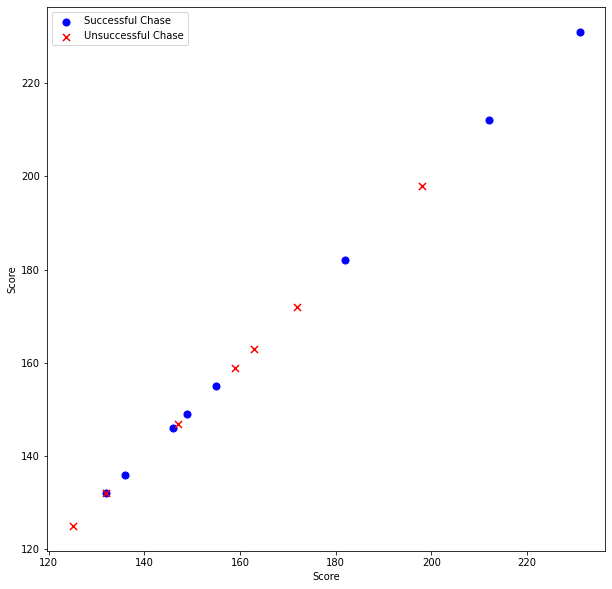

In [ ]:
ychase = c[c['Chase'].isin([1])]
nchase = c[c['Chase'].isin([0])]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(ychase['1'], ychase['1'], s=50, c='b', marker='o', label='Successful Chase')
ax.scatter(nchase['1'], nchase['1'], s=50, c='r', marker='x', label='Unsuccessful Chase')
ax.legend()
ax.set_xlabel('Score')
ax.set_ylabel('Score')

In [ ]:
x.to_numpy()
x = x.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print ("Accuracy : ", accuracy_score(y_pred, y_test)*100)

Accuracy :  0.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



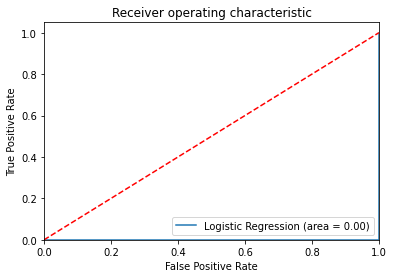

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.688180
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  Chase   No. Observations:                   15
Model:                          Logit   Df Residuals:                       14
Method:                           MLE   Df Model:                            0
Date:                Sat, 02 Oct 2021   Pseudo R-squ.:                0.003971
Time:                        14:14:49   Log-Likelihood:                -10.323
converged:                       True   LL-Null:                       -10.364
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0012      0.003      0.385      0.700      -0.005       0.007
